<a href="https://colab.research.google.com/github/chelimillarohith/mobile-price-prediction/blob/main/mobile_price_prediction_decision_classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df=pd.read_csv("/mobile_prices_2023.csv")

In [ ]:
df.head(5)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1836 non-null   object 
 1   Rating ?/5         1836 non-null   float64
 2   Number of Ratings  1836 non-null   object 
 3   RAM                1836 non-null   object 
 4   ROM/Storage        1662 non-null   object 
 5   Back/Rare Camera   1827 non-null   object 
 6   Front Camera       1435 non-null   object 
 7   Battery            1826 non-null   object 
 8   Processor          1781 non-null   object 
 9   Price in INR       1836 non-null   object 
 10  Date of Scraping   1836 non-null   object 
dtypes: float64(1), object(10)
memory usage: 157.9+ KB


In [ ]:
df.duplicated().sum()

69

In [ ]:
df.shape

(1836, 11)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
Phone Name,0
Rating ?/5,0
Number of Ratings,0
RAM,0
ROM/Storage,162
Back/Rare Camera,8
Front Camera,381
Battery,9
Processor,49
Price in INR,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
...,...,...,...,...,...,...,...,...,...,...,...
1831,"Infinix Note 7 (Forest Green, 64 GB)",4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17
1832,"Infinix Note 7 (Bolivia Blue, 64 GB)",4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17
1833,"Infinix Note 7 (Aether Black, 64 GB)",4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17
1834,"Infinix Zero 8i (Silver Diamond, 128 GB)",4.2,"7,117",8 GB RAM,128 GB ROM,48MP + 8MP + 2MP + AI Lens Camera,16MP + 8MP Dual Front Camera,4500 mAh,MediaTek Helio G90T Processor,"₹18,999",2023-06-17


In [ ]:
df.shape

(1252, 11)

In [ ]:
df.drop(columns=['Date of Scraping'],inplace=True)

In [ ]:
df['Phone Name'].str.split()

,Phone Name
0,"[POCO, C50, (Royal, Blue,, 32, GB)]"
1,"[POCO, M4, 5G, (Cool, Blue,, 64, GB)]"
2,"[POCO, C51, (Royal, Blue,, 64, GB)]"
3,"[POCO, C55, (Cool, Blue,, 64, GB)]"
4,"[POCO, C51, (Power, Black,, 64, GB)]"
...,...
1831,"[Infinix, Note, 7, (Forest, Green,, 64, GB)]"
1832,"[Infinix, Note, 7, (Bolivia, Blue,, 64, GB)]"
1833,"[Infinix, Note, 7, (Aether, Black,, 64, GB)]"
1834,"[Infinix, Zero, 8i, (Silver, Diamond,, 128, GB)]"


In [ ]:
import re
def remove_parentheses(text):
    if isinstance(text, str):
        return re.sub(r"\s*\(.*?\)", "", text)
    return text
df['Phone Name'] = df['Phone Name'].apply(remove_parentheses)

In [ ]:
df['Price in INR']=df['Price in INR'].str.replace('₹','').str.replace(',','')

In [ ]:
df['Price in INR']=df['Price in INR'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1252 entries, 0 to 1835
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1252 non-null   object 
 1   Rating ?/5         1252 non-null   float64
 2   Number of Ratings  1252 non-null   object 
 3   RAM                1252 non-null   object 
 4   ROM/Storage        1252 non-null   object 
 5   Back/Rare Camera   1252 non-null   object 
 6   Front Camera       1252 non-null   object 
 7   Battery            1252 non-null   object 
 8   Processor          1252 non-null   object 
 9   Price in INR       1252 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 139.9+ KB


In [ ]:
df['RAM'].unique()

array(['2 GB RAM', '4 GB RAM', '6 GB RAM', '3 GB RAM', '8 GB RAM',
       '12 GB RAM', '8 MB RAM', '1 GB RAM', '16 MB RAM', '512 MB RAM',
       '1.5 GB RAM'], dtype=object)

In [ ]:
df = df[df['RAM'] != '1.5 GB RAM']

In [ ]:
df['RAM'].unique()

array(['2 GB RAM', '4 GB RAM', '6 GB RAM', '3 GB RAM', '8 GB RAM',
       '12 GB RAM', '8 MB RAM', '1 GB RAM', '16 MB RAM', '512 MB RAM'],
      dtype=object)

In [ ]:
df['RAM'].str.split()

,RAM
0,"[2, GB, RAM]"
1,"[4, GB, RAM]"
2,"[4, GB, RAM]"
3,"[4, GB, RAM]"
4,"[4, GB, RAM]"
...,...
1831,"[4, GB, RAM]"
1832,"[4, GB, RAM]"
1833,"[4, GB, RAM]"
1834,"[8, GB, RAM]"


In [ ]:
df['RAM'] = df['RAM'].apply(lambda x: int(x.split()[0]) * 1024 if 'GB' in x else int(x.split()[0]))

<ipython-input-42-1536dee8ad3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RAM'] = df['RAM'].apply(lambda x: int(x.split()[0]) * 1024 if 'GB' in x else int(x.split()[0]))


In [ ]:
df['Battery']=df['Battery'].str.replace("mAh",'')

<ipython-input-43-c2d3a4c8e45c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Battery']=df['Battery'].str.replace("mAh",'')


In [ ]:
df['ROM/Storage'].unique()

array(['32 GB ROM', '64 GB ROM', '128 GB ROM', '256 GB ROM', '0 GB ROM',
       '512 GB ROM', '16 GB ROM', '8 GB ROM', 'NA ROM', '4 GB ROM'],
      dtype=object)

In [ ]:
df = df[df['ROM/Storage'] != '0 GB ROM']

In [ ]:
df['ROM/Storage'].unique()

array(['32 GB ROM', '64 GB ROM', '128 GB ROM', '256 GB ROM', '512 GB ROM',
       '16 GB ROM', '8 GB ROM', 'NA ROM', '4 GB ROM'], dtype=object)

In [ ]:
df['ROM/Storage'] = df['ROM/Storage'].apply(lambda x: int(x.split()[0]) if isinstance(x, str) and 'NA' not in x else np.nan)
df = df.dropna()
df['ROM/Storage'] = df['ROM/Storage'].astype(int)

<ipython-input-47-8c82712fb0ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ROM/Storage'] = df['ROM/Storage'].astype(int)


In [ ]:
df.head(5)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR
0,POCO C50,4.2,"33,561",2048,32,8MP Dual Camera,5MP Front Camera,5000,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5649
1,POCO M4 5G,4.2,"77,128",4096,64,50MP + 2MP,8MP Front Camera,5000,Mediatek Dimensity 700 Processor,11999
2,POCO C51,4.3,"15,175",4096,64,8MP Dual Rear Camera,5MP Front Camera,5000,Helio G36 Processor,6999
3,POCO C55,4.2,"22,621",4096,64,50MP Dual Rear Camera,5MP Front Camera,5000,Mediatek Helio G85 Processor,7749
4,POCO C51,4.3,"15,175",4096,64,8MP Dual Rear Camera,5MP Front Camera,5000,Helio G36 Processor,6999


In [ ]:
df["Number of Ratings"]=df["Number of Ratings"].str.replace(',','')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1249 entries, 0 to 1835
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1249 non-null   object 
 1   Rating ?/5         1249 non-null   float64
 2   Number of Ratings  1249 non-null   object 
 3   RAM                1249 non-null   int64  
 4   ROM/Storage        1249 non-null   int64  
 5   Back/Rare Camera   1249 non-null   object 
 6   Front Camera       1249 non-null   object 
 7   Battery            1249 non-null   object 
 8   Processor          1249 non-null   object 
 9   Price in INR       1249 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 107.3+ KB


In [ ]:
df['Number of Ratings']=df['Number of Ratings'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1249 entries, 0 to 1835
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1249 non-null   object 
 1   Rating ?/5         1249 non-null   float64
 2   Number of Ratings  1249 non-null   int64  
 3   RAM                1249 non-null   int64  
 4   ROM/Storage        1249 non-null   int64  
 5   Back/Rare Camera   1249 non-null   object 
 6   Front Camera       1249 non-null   object 
 7   Battery            1249 non-null   object 
 8   Processor          1249 non-null   object 
 9   Price in INR       1249 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 107.3+ KB


In [ ]:
df['Battery'].corr(df['Price in INR'])

-0.1535863215431366

In [ ]:
df['Rating ?/5'].corr(df['Price in INR'])

-0.028591584166195873

In [ ]:
df['Number of Ratings'].corr(df['Price in INR'])

-0.20952290149516944

In [ ]:
df

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR
0,POCO C50,4.2,33561,2048,32,8MP Dual Camera,5MP Front Camera,5000,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5649
1,POCO M4 5G,4.2,77128,4096,64,50MP + 2MP,8MP Front Camera,5000,Mediatek Dimensity 700 Processor,11999
2,POCO C51,4.3,15175,4096,64,8MP Dual Rear Camera,5MP Front Camera,5000,Helio G36 Processor,6999
3,POCO C55,4.2,22621,4096,64,50MP Dual Rear Camera,5MP Front Camera,5000,Mediatek Helio G85 Processor,7749
4,POCO C51,4.3,15175,4096,64,8MP Dual Rear Camera,5MP Front Camera,5000,Helio G36 Processor,6999
...,...,...,...,...,...,...,...,...,...,...
1831,Infinix Note 7,4.3,25582,4096,64,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000,MediaTek Helio G70 Processor,14999
1832,Infinix Note 7,4.3,25582,4096,64,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000,MediaTek Helio G70 Processor,14999
1833,Infinix Note 7,4.3,25582,4096,64,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000,MediaTek Helio G70 Processor,14999
1834,Infinix Zero 8i,4.2,7117,8192,128,48MP + 8MP + 2MP + AI Lens Camera,16MP + 8MP Dual Front Camera,4500,MediaTek Helio G90T Processor,18999


In [ ]:
df['Front Camera'].unique()

array(['5MP Front Camera', '8MP Front Camera', '16MP Front Camera',
       '13MP Front Camera', '20MP + 2MP Dual Front Camera',
       '20MP Front Camera', '32MP + 8MP Dual Front Camera',
       '32MP Front Camera', '16MP + 8MP Dual Front Camera',
       '10MP Front Camera', '12MP Front Camera', '25MP Front Camera',
       '32MP + 2MP Dual Front Camera', '16MP + 2MP Dual Front Camera',
       '16MP Dual Front Camera', '44MP + 2MP Dual Front Camera',
       '10.8MP Front Camera', '8MP + 8MP Dual Front Camera',
       '50MP Front Camera', '50MP + 8MP Dual Front Camera',
       '44MP Front Camera', '24MP Front Camera', '1.6MP Front Camera',
       '4MP Front Camera', '2MP Front Camera',
       '8MP + 2MP Dual Front Camera', '60MP Front Camera',
       '0.3MP Front Camera', '1.3MP Front Camera',
       '13MP + 5MP Dual Front Camera', '60 MP with OIS'], dtype=object)

In [ ]:
df['Back/Rare Camera'].unique()

array(['8MP Dual Camera', '50MP + 2MP', '8MP Dual Rear Camera',
       '50MP Dual Rear Camera',
       '50MP + 2MP Depth Sensor + 2MP Macro Sensor', '64MP + 8MP + 2MP',
       '48MP + 8MP + 2MP', '50MP + 8MP', '108MP + 8MP + 2MP',
       '48MP + 2MP + 2MP', '64MP (OIS) + 8MP + 2MP', '13MP + 2MP + 2MP',
       '64MP + 8MP + 2MP + 2MP', '12MP + 5MP', '13MP + 8MP + 5MP + 2MP',
       '48MP + 8MP + 5MP + 2MP', '48MP + 8MP + 2MP + 2MP',
       '64MP + 13MP + 2MP + 2MP', '64MP + 2MP', '50MP + 0.3MP',
       '8MP Rear Camera', '108MP + 2MP', '50MP + 2MP + 2MP',
       '50MP + 2MP + 0.3MP', '50MP + 8MP + 2MP', '13MP + 2MP + 0.3MP',
       '50MP Rear Camera', '64MP + 8MP + 8MP + 2MP',
       '64MP + 12MP + 8MP + 2MP', '13MP + 2MP', '50MP + 5MP + 2MP',
       '50MP + 12MP + 10MP', '50MP + 5MP', '12MP + 12MP',
       '48MP + 8MP + 5MP', '50MP + 12MP + 5MP', '12MP + 12MP + 8MP (OIS)',
       '12MP + 12MP + 8MP Rear Camera', '50MP + 50MP + 2MP + 2MP',
       '50MP + 10MP + 12MP', '200MP + 10MP + 12

In [ ]:
df['RAM'].corr(df['Price in INR'])

0.6549267439195038

In [ ]:
df['ROM/Storage'].corr(df['Price in INR'])

0.6769377440413465

In [ ]:
df.drop(columns=['Number of Ratings'], inplace=True)

In [ ]:
df.drop(columns=['Rating ?/5'],inplace=True)

In [ ]:
df['Processor']=df['Processor'].apply(lambda x:x.split()[0])

In [ ]:
df['Processor'].value_counts()

,count
Processor,
Qualcomm,430
Mediatek,263
MediaTek,212
Unisoc,82
Exynos,46
Dimensity,34
1,24
Helio,18
Snapdragon,15


In [ ]:
df['Front Camera'] = df['Front Camera'].apply(
    lambda x: int(float(x.split()[0].replace('MP', '').replace('M', '').strip()))
    if isinstance(x, str) and x.split()[0].replace('MP', '').replace('M', '').strip().replace('.', '', 1).isdigit()
    else np.nan
)

df = df.dropna(subset=['Front Camera'])

df['Front Camera'] = df['Front Camera'].astype(int)


In [ ]:
df['Front Camera'].unique()

array([ 5,  8, 16, 13, 20, 32, 10, 12, 25, 44, 50, 24,  1,  4,  2, 60,  0])

In [ ]:
df.drop(columns=['Back/Rare Camera'],inplace=True)

In [ ]:
df

,Phone Name,RAM,ROM/Storage,Front Camera,Battery,Processor,Price in INR
0,POCO C50,2048,32,5,5000,Mediatek,5649
1,POCO M4 5G,4096,64,8,5000,Mediatek,11999
2,POCO C51,4096,64,5,5000,Helio,6999
3,POCO C55,4096,64,5,5000,Mediatek,7749
4,POCO C51,4096,64,5,5000,Helio,6999
...,...,...,...,...,...,...,...
1831,Infinix Note 7,4096,64,16,5000,MediaTek,14999
1832,Infinix Note 7,4096,64,16,5000,MediaTek,14999
1833,Infinix Note 7,4096,64,16,5000,MediaTek,14999
1834,Infinix Zero 8i,8192,128,16,4500,MediaTek,18999


In [ ]:
df['Front Camera'].corr(df['Price in INR'])

0.43539354618181675

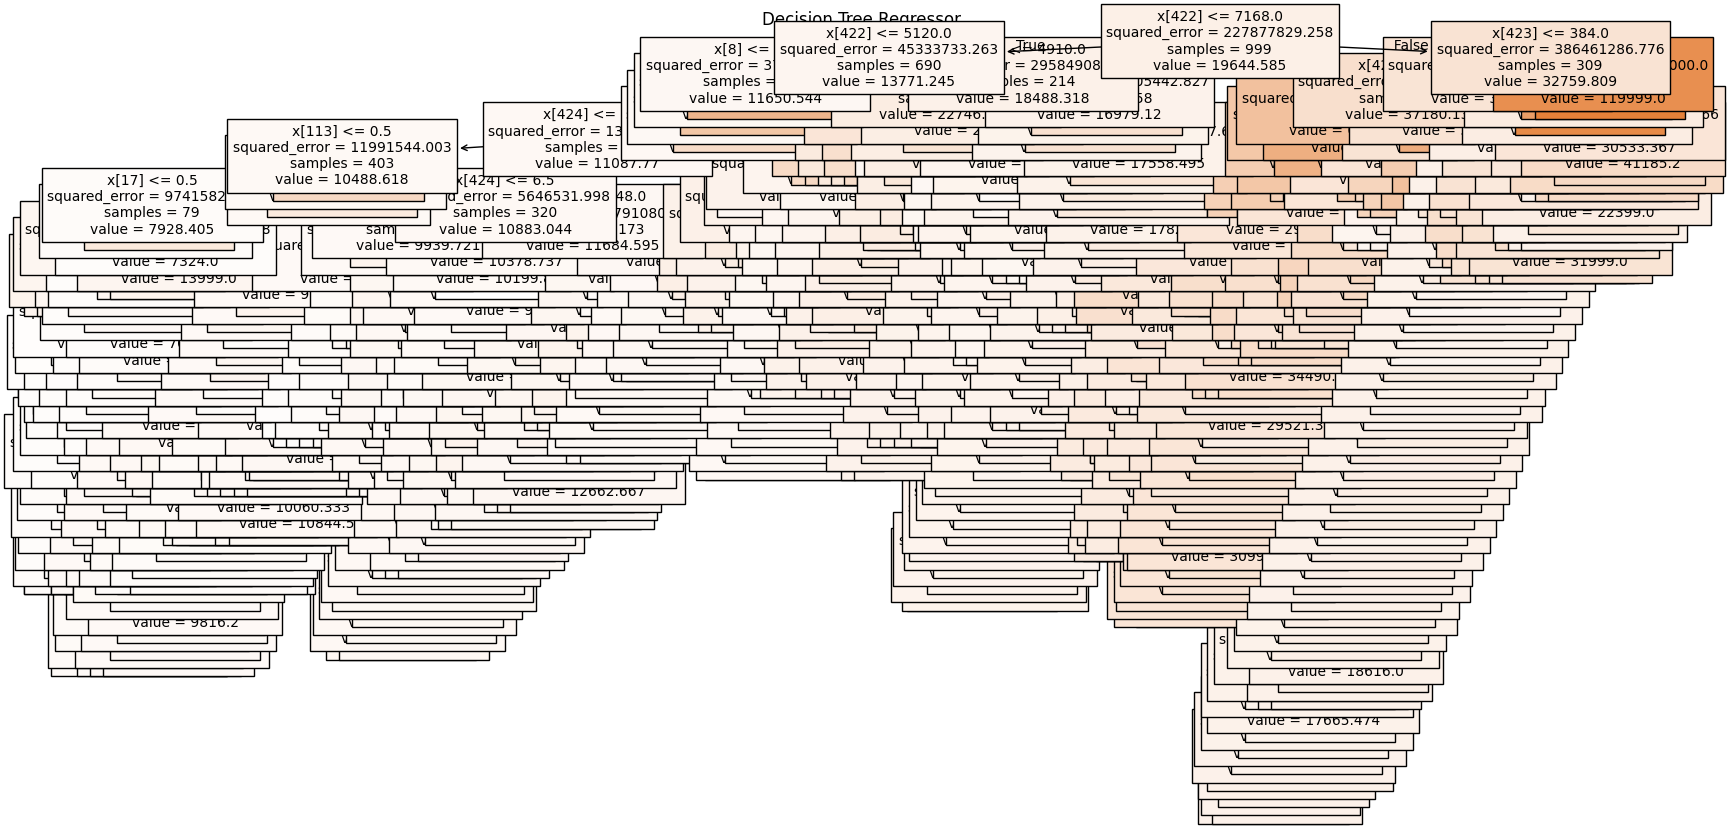

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = df[['Phone Name', 'RAM', 'ROM/Storage', 'Front Camera', 'Battery', 'Processor']]
y = df['Price in INR']

step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(handle_unknown='ignore'), ['Phone Name', 'Processor'])
    ],
    remainder='passthrough'
)
pipe = Pipeline(steps=[
    ('preprocessor', step1),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipe.fit(X_train, y_train)

regressor = pipe.named_steps['regressor']
plt.figure(figsize=(20, 10))
plot_tree(
    regressor,
    filled=True,
    fontsize=10
)
plt.title("Decision Tree Regressor")
plt.show()


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(r2)



0.9100665614355565


In [ ]:

new_product = pd.DataFrame({
    'Phone Name': ['iqoo'],
    'RAM': [4096],
    'ROM/Storage': [128],
    'Front Camera': [8],
    'Battery': [5000],
    'Processor': ['Qualcomm ']
})

predicted_price = pipe.predict(new_product)
print(f"Predicted Price for the new product: {predicted_price[0]} INR")


Predicted Price for the new product: 11999.0 INR
